In [1]:
# This project is related to Berlin AIRBNB and here a step forward is taken to predict the prices of AIRBNB property.
# important imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:

# get listing data from listing_summary and listings and concat into one dataframe!
df_listings1 = pd.read_csv('listings.csv')
df_listings2 = pd.read_csv('listings_summary.csv')
df_listings1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


In [3]:
df_listings1.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
df_listings2.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42


In [5]:
df_listings1.shape

(22552, 16)

In [6]:
df_listings = pd.concat((df_listings2, df_listings1['neighbourhood_group']), axis =1)

In [7]:
df_listings.shape

(22552, 97)

In [8]:
df_listings.shape

(22552, 97)

In [9]:
# Now there are total 97 columns, so we need to select the columns which are going to be helpful in the price prediction.

columns_to_keep = ['id', 'space', 'description','transit', 'access', 'house_rules', 'host_id', 'host_response_time', 'host_acceptance_rate',
                  'host_identity_verified', 'neighbourhood_group', 'city', 'market', 'smart_location', 'country', 'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability','instant_bookable',
       'is_business_travel_ready', 'cancellation_policy', 'latitude', 'longitude']

df_raw_project = df_listings[columns_to_keep].set_index('id')


In [10]:
df_raw_project.shape

(22552, 38)

In [11]:
# See if there is any missing values.
df_raw_project.isna().sum()

space                        8532
description                   203
transit                      9516
access                      11715
house_rules                 11103
host_id                         0
host_response_time          12894
host_acceptance_rate        22552
host_identity_verified         26
neighbourhood_group             0
city                            5
market                         63
smart_location                  0
country                         0
is_location_exact               0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                      32
bedrooms                       18
beds                           40
bed_type                        0
amenities                       0
square_feet                 22106
price                           0
security_deposit             9361
cleaning_fee                 7146
guests_included                 0
extra_people                    0
minimum_nights

In [12]:
# Drop the columns with large number of missing values.
df_raw_project.drop(columns = ['space','transit', 'access', 'house_rules', 'host_response_time','host_acceptance_rate'], axis =1, inplace = True)

In [13]:
df_raw_project.drop(columns = ['square_feet'], axis = 1, inplace = True)

In [14]:
df_raw_project.shape

(22552, 31)

In [15]:
# Treat the columns with few missing values by fillna.
df_raw_project['market'].fillna(df_raw_project['market'].mode, inplace = True)
df_raw_project['city'].fillna(df_raw_project['city'].mode, inplace = True)

In [16]:
# Clean the numerical columns with special characters.
df_raw_project[['price', 'cleaning_fee', 'extra_people', 'security_deposit']].head()

,price,cleaning_fee,extra_people,security_deposit
id,,,,
2015,$60.00,$30.00,$28.00,$200.00
2695,$17.00,$0.00,$0.00,$0.00
3176,$90.00,$50.00,$20.00,$200.00
3309,$26.00,$30.00,$18.00,$250.00
7071,$42.00,$0.00,$24.00,$0.00


In [17]:
df_raw_project['price'].isna().sum()


0

In [18]:
df_raw_project['cleaning_fee'].isna().sum()


7146

In [19]:
df_raw_project['cleaning_fee'].fillna('$0.00', inplace = True)

In [20]:
df_raw_project['extra_people'].isna().sum()

0

In [21]:
df_raw_project['security_deposit'].isna().sum()

9361

In [22]:
df_raw_project['security_deposit'].fillna('$0.00', inplace = True)

In [23]:
df_raw_project.price = df_raw_project.price.str.replace('$', '').str.replace(',', '').astype(float)
df_raw_project.cleaning_fee = df_raw_project.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float)
df_raw_project.security_deposit = df_raw_project.security_deposit.str.replace('$', '').str.replace(',', '').astype(float)
df_raw_project.extra_people = df_raw_project.extra_people.str.replace('$', '').str.replace(',', '').astype(float)

In [24]:
df_raw_project.head(1)

,description,host_id,host_identity_verified,neighbourhood_group,city,market,smart_location,country,is_location_exact,property_type,...,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,instant_bookable,is_business_travel_ready,cancellation_policy,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,,
2015,Great location! 30 of 75 sq meters. This wood...,2217,t,Mitte,Berlin,Berlin,"Berlin, Germany",Germany,f,Guesthouse,...,28.0,4,1125,3 months ago,t,f,f,strict_14_with_grace_period,52.534537,13.402557


In [25]:
df_raw_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22552 entries, 2015 to 29867352
Data columns (total 31 columns):
description                 22349 non-null object
host_id                     22552 non-null int64
host_identity_verified      22526 non-null object
neighbourhood_group         22552 non-null object
city                        22552 non-null object
market                      22552 non-null object
smart_location              22552 non-null object
country                     22552 non-null object
is_location_exact           22552 non-null object
property_type               22552 non-null object
room_type                   22552 non-null object
accommodates                22552 non-null int64
bathrooms                   22520 non-null float64
bedrooms                    22534 non-null float64
beds                        22512 non-null float64
bed_type                    22552 non-null object
amenities                   22552 non-null object
price                       22552 

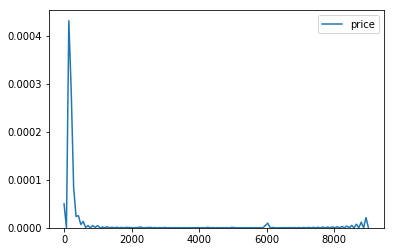

In [26]:
# Now since there are large number of columns and to see the normal distribution of each and every column is difficult.
#Thus, look the distribution of target column which is price.
sns.kdeplot(df_raw_project['price'])
#right skewed

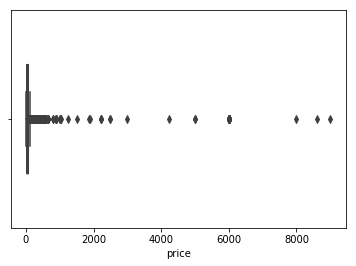

In [27]:

sns.boxplot(x = df_raw_project['price'], width=0.5, whis=1.5, saturation=1, notch=True)
plt.show()


In [28]:
df_raw_project.drop(df_raw_project[ (df_raw_project.price > 350) | (df_raw_project.price == 0) ].index, axis=0, inplace=True)

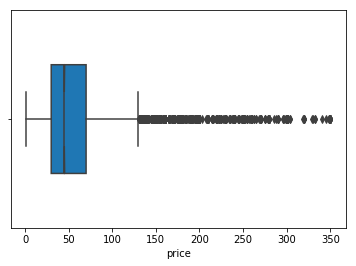

In [29]:
sns.boxplot(x = df_raw_project['price'], width=0.5, whis=1.5, saturation=1, notch=True)
plt.show()

In [30]:
df_raw_project.shape


(22410, 31)

In [31]:
# Size of a house is important in predicting the price and since now there is no size data, thus we extract the size of a house from description of the data.
df_raw_project.description

id
2015        Great location!  30 of 75 sq meters. This wood...
2695        In the summertime we are spending most of our ...
3176        This beautiful first floor apartment  is situa...
3309        First of all: I prefer short-notice bookings. ...
7071        Cozy and large room in the beautiful district ...
9991        4 bedroom with very large windows and outstand...
14325       The apartment is located on the upper second f...
16401       Hello future guests! We want to rent our cute ...
16644       Light and sunny 2-Room-turn of the century-fla...
17409       The 25 sqm room is located in the heart of Ber...
17904       - beautiful studio apt in downtown Berlin - br...
20858       Bright and sunny condo with two balconies in a...
21869       Light and sunny 1-Room-turn of the century-fla...
22415       Very nice furnished 2 bedroom apartment for su...
22677       Comfortable, cozy and quiet 70m2 apartment plu...
23834       Beautiful and calm apartment in close vicinity...
24569

In [32]:
df_raw_project['size'] = df_raw_project['description'].str.extract('(\d{2,3}\s?[smSM])', expand=True)
df_raw_project['size'] = df_raw_project['size'].str.replace("\D", "")
df_raw_project['size'] = df_raw_project['size'].astype(float)


In [33]:
df_raw_project['size']

id
2015         75.0
2695         25.0
3176         68.0
3309         26.0
7071         20.0
9991        780.0
14325         NaN
16401        55.0
16644        80.0
17409        25.0
17904        16.0
20858         NaN
21869         NaN
22415         NaN
22677        70.0
23834        50.0
24569       150.0
25653       150.0
26543        84.0
28156         NaN
28268        75.0
28711        38.0
29279        25.0
30295       100.0
31440         NaN
33043        47.0
35642        75.0
36480        10.0
37004       200.0
37052        65.0
            ...  
29828388      NaN
29829280      NaN
29830140    500.0
29830204      NaN
29830381    100.0
29838765      NaN
29842909    110.0
29844866      NaN
29846605    500.0
29848269      NaN
29848527      NaN
29848903      NaN
29848907      NaN
29849186      NaN
29849565      NaN
29849958      NaN
29850404      NaN
29850644      NaN
29850727      NaN
29851223     10.0
29851651      NaN
29853463      NaN
29856029     70.0
29856359      NaN
2985664

In [34]:
# Price can also depend upon the fact that how far is the accomodation from the centre of the berlin. For that, we use geopy library.
import geopy


In [35]:
from geopy.distance import great_circle

In [36]:
def distance_to_mid(lat, lon):
    berlin_centre = (52.5373, 13.3603)
    accomodation = (lat, lon)
    return great_circle(berlin_centre, accomodation).km

In [37]:
df_raw_project['distance'] = df_raw_project.apply(lambda x: distance_to_mid(x.latitude, x.longitude), axis =1)

In [38]:
df_raw_project.drop(['description'], axis =1 , inplace = True)

In [39]:
# Now there are certain null values in the size column so we use linear regression allgorithm to predict the missing values.
sub_df = df_raw_project[['accommodates', 'price', 'cleaning_fee', 
                 'security_deposit', 'extra_people', 'guests_included', 'distance', 'size']]

In [40]:
train_data = sub_df[sub_df['size'].notnull()]
test_data  = sub_df[sub_df['size'].isnull()]

# define X
X_train = train_data.drop('size', axis=1)
X_test  = test_data.drop('size', axis=1)

# define y
y_train = train_data['size']

In [41]:
print("Shape of Training Data:", train_data.shape)
print("Shape of Test Data:    ",test_data.shape)
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("\nShape of y_train:", y_train.shape)

Shape of Training Data: (10683, 8)
Shape of Test Data:     (11727, 8)

Shape of X_train: (10683, 7)
Shape of X_test: (11727, 7)

Shape of y_train: (10683,)


In [42]:
import sklearn

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
linreg = LinearRegression()

In [45]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
y_test = linreg.predict(X_test)

In [47]:
y_test = pd.DataFrame(y_test)
y_test.columns = ['size']
print(y_test.shape)
y_test.head()

(11727, 1)


,size
0,58.976403
1,100.639276
2,75.766116
3,89.332535
4,63.044166


In [48]:
# make the index of X_test to an own dataframe
prelim_index = pd.DataFrame(X_test.index)
prelim_index.columns = ['prelim']

# ... and concat this dataframe with y_test
y_test = pd.concat([y_test, prelim_index], axis=1)
y_test.set_index(['prelim'], inplace=True)
y_test.head()

,size
prelim,
14325,58.976403
20858,100.639276
21869,75.766116
22415,89.332535
28156,63.044166


In [49]:
new_test_data = pd.concat([X_test, y_test], axis=1)

In [50]:
print(new_test_data.shape)
new_test_data.head()

(11727, 8)


,accommodates,price,cleaning_fee,security_deposit,extra_people,guests_included,distance,size
14325,2,70.0,0.0,500.0,0.0,1,3.277850,58.976403
20858,4,129.0,49.0,500.0,24.0,2,3.200343,100.639276
21869,4,70.0,40.0,500.0,18.0,2,6.329262,75.766116
22415,4,98.0,50.0,300.0,25.0,2,6.601303,89.332535
28156,2,70.0,0.0,1660.0,0.0,1,3.206696,63.044166


In [51]:
new_test_data['size'].isna().sum()

0

In [52]:
# combine train and test data back to a new sub df
sub_df_new = pd.concat([new_test_data, train_data], axis=0)

print(sub_df_new.shape)
sub_df_new.head()

(22410, 8)


,accommodates,price,cleaning_fee,security_deposit,extra_people,guests_included,distance,size
14325,2,70.0,0.0,500.0,0.0,1,3.277850,58.976403
20858,4,129.0,49.0,500.0,24.0,2,3.200343,100.639276
21869,4,70.0,40.0,500.0,18.0,2,6.329262,75.766116
22415,4,98.0,50.0,300.0,25.0,2,6.601303,89.332535
28156,2,70.0,0.0,1660.0,0.0,1,3.206696,63.044166


In [53]:
df_raw_project.drop(['accommodates', 'price', 'cleaning_fee', 
             'security_deposit', 'extra_people', 'guests_included', 'distance', 'size'], 
            axis=1, inplace=True)

In [54]:
df = pd.concat([sub_df_new, df_raw_project], axis=1)

print(df.shape)
df.head(2)

(22410, 32)


,accommodates,price,cleaning_fee,security_deposit,extra_people,guests_included,distance,size,host_id,host_identity_verified,...,amenities,minimum_nights,maximum_nights,calendar_updated,has_availability,instant_bookable,is_business_travel_ready,cancellation_policy,latitude,longitude
2015,3,60.0,30.0,200.0,28.0,1,2.874550,75.0,2217,t,...,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",4,1125,3 months ago,t,f,f,strict_14_with_grace_period,52.534537,13.402557
2695,2,17.0,0.0,0.0,0.0,1,3.241947,25.0,2986,t,...,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",2,40,7 weeks ago,t,f,f,flexible,52.548513,13.404553


In [55]:
# Now there are certain null values in bathrooms column so we use linear regression allgorithm to predict the missing values.

sub_df1 = df[['accommodates', 'price', 'cleaning_fee', 
                 'security_deposit', 'extra_people', 'guests_included', 'distance', 'size', 'bathrooms']]

In [56]:
sub_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22410 entries, 2015 to 29867352
Data columns (total 9 columns):
accommodates        22410 non-null int64
price               22410 non-null float64
cleaning_fee        22410 non-null float64
security_deposit    22410 non-null float64
extra_people        22410 non-null float64
guests_included     22410 non-null int64
distance            22410 non-null float64
size                22410 non-null float64
bathrooms           22378 non-null float64
dtypes: float64(7), int64(2)
memory usage: 1.7 MB


In [57]:
train_data1 = sub_df1[sub_df1['bathrooms'].notnull()]
test_data1  = sub_df1[sub_df1['bathrooms'].isnull()]

# define X
X_train1 = train_data1.drop('bathrooms', axis=1)
X_test1  = test_data1.drop('bathrooms', axis=1)

# define y
y_train1 = train_data1['bathrooms']

In [58]:
linreg.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
y_test1 = linreg.predict(X_test1)

In [60]:
y_test2 = pd.DataFrame(y_test1)
y_test2.columns = ['bathrooms']
print(y_test2.shape)
y_test2.head()

(32, 1)


,bathrooms
0,1.114307
1,1.075961
2,1.156846
3,1.040636
4,1.044370


In [61]:
# make the index of X_test1 to an own dataframe
prelim_index1 = pd.DataFrame(X_test1.index)
prelim_index1.columns = ['prelim']

# ... and concat this dataframe with y_test
y_test3 = pd.concat([y_test2, prelim_index1], axis=1)
y_test3.set_index(['prelim'], inplace=True)
y_test3.head()

,bathrooms
prelim,
28711,1.114307
55298,1.075961
138955,1.156846
189596,1.040636
245991,1.044370


In [62]:
new_test_data1 = pd.concat([X_test1, y_test3], axis=1)

In [63]:
new_test_data1.head()

,accommodates,price,cleaning_fee,security_deposit,extra_people,guests_included,distance,size,bathrooms
prelim,,,,,,,,,
28711,3,60.0,30.0,0.0,10.0,2,7.604900,38.000000,1.114307
55298,1,88.0,10.0,0.0,0.0,1,4.504894,62.389040,1.075961
138955,4,75.0,40.0,0.0,10.0,2,5.272343,72.135464,1.156846
189596,2,80.0,0.0,100.0,100.0,2,2.718845,45.000000,1.040636
245991,2,23.0,0.0,650.0,0.0,2,10.171401,10.000000,1.044370


In [64]:
new_test_data1['bathrooms'].isna().sum()

0

In [65]:
# combine train and test data back to a new sub df
sub_df_new1 = pd.concat([new_test_data1, train_data1], axis=0)

print(sub_df_new1.shape)
sub_df_new1.head()

(22410, 9)


,accommodates,price,cleaning_fee,security_deposit,extra_people,guests_included,distance,size,bathrooms
28711,3,60.0,30.0,0.0,10.0,2,7.604900,38.000000,1.114307
55298,1,88.0,10.0,0.0,0.0,1,4.504894,62.389040,1.075961
138955,4,75.0,40.0,0.0,10.0,2,5.272343,72.135464,1.156846
189596,2,80.0,0.0,100.0,100.0,2,2.718845,45.000000,1.040636
245991,2,23.0,0.0,650.0,0.0,2,10.171401,10.000000,1.044370


In [66]:
df.drop(['accommodates', 'price', 'cleaning_fee', 
             'security_deposit', 'extra_people', 'guests_included', 'distance', 'size','bathrooms'], 
            axis=1, inplace=True)

In [67]:
df1 = pd.concat([sub_df_new1, df], axis=1)

print(df1.shape)
df1.head(2)

(22410, 32)


,accommodates,price,cleaning_fee,security_deposit,extra_people,guests_included,distance,size,bathrooms,host_id,...,amenities,minimum_nights,maximum_nights,calendar_updated,has_availability,instant_bookable,is_business_travel_ready,cancellation_policy,latitude,longitude
2015,3,60.0,30.0,200.0,28.0,1,2.874550,75.0,1.0,2217,...,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",4,1125,3 months ago,t,f,f,strict_14_with_grace_period,52.534537,13.402557
2695,2,17.0,0.0,0.0,0.0,1,3.241947,25.0,1.0,2986,...,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",2,40,7 weeks ago,t,f,f,flexible,52.548513,13.404553


In [68]:
# Now there are certain null values in the bedrooms column so we use linear regression allgorithm to predict the missing values.

df1['bedrooms'].isna().sum()

18

In [69]:
sub_df2 = df1[['accommodates', 'price', 'cleaning_fee', 
                 'security_deposit', 'extra_people', 'guests_included', 'distance', 'size', 'bathrooms', 'bedrooms']]

train_data2 = sub_df2[sub_df2['bedrooms'].notnull()]
test_data2  = sub_df2[sub_df2['bedrooms'].isnull()]

# define X
X_train2 = train_data2.drop('bedrooms', axis=1)
X_test2  = test_data2.drop('bedrooms', axis=1)

# define y
y_train2 = train_data2['bedrooms']

linreg.fit(X_train2, y_train2)
y_test5 = linreg.predict(X_test2)
y_test6 = pd.DataFrame(y_test5)
y_test6.columns = ['bedrooms']


# make the index of X_test1 to an own dataframe
prelim_index2 = pd.DataFrame(X_test2.index)
prelim_index2.columns = ['prelim']

# ... and concat this dataframe with y_test
y_test7 = pd.concat([y_test6, prelim_index2], axis=1)
y_test7.set_index(['prelim'], inplace=True)
y_test7.head()

new_test_data2 = pd.concat([X_test2, y_test7], axis=1)

# combine train and test data back to a new sub df
sub_df_new2 = pd.concat([new_test_data2, train_data2], axis=0)



df1.drop(['accommodates', 'price', 'cleaning_fee', 
             'security_deposit', 'extra_people', 'guests_included', 'distance', 'size','bathrooms','bedrooms'], 
            axis=1, inplace=True)

df2 = pd.concat([sub_df_new2, df1], axis=1)

print(df2.shape)
df2.head(2)

(22410, 32)


,accommodates,price,cleaning_fee,security_deposit,extra_people,guests_included,distance,size,bathrooms,bedrooms,...,amenities,minimum_nights,maximum_nights,calendar_updated,has_availability,instant_bookable,is_business_travel_ready,cancellation_policy,latitude,longitude
2015,3,60.0,30.0,200.0,28.0,1,2.874550,75.0,1.0,1.0,...,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",4,1125,3 months ago,t,f,f,strict_14_with_grace_period,52.534537,13.402557
2695,2,17.0,0.0,0.0,0.0,1,3.241947,25.0,1.0,1.0,...,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",2,40,7 weeks ago,t,f,f,flexible,52.548513,13.404553


In [70]:
df2['bedrooms'].isna().sum()

0

In [71]:
# Now there are certain null values in the beds column so we use linear regression allgorithm to predict the missing values.

sub_df3 = df2[['accommodates', 'price', 'cleaning_fee', 
                 'security_deposit', 'extra_people', 'guests_included', 'distance', 'size', 'bathrooms', 'bedrooms', 'beds']]

train_data3 = sub_df3[sub_df3['beds'].notnull()]
test_data3  = sub_df3[sub_df3['beds'].isnull()]

# define X
X_train3 = train_data3.drop('beds', axis=1)
X_test3  = test_data3.drop('beds', axis=1)

# define y
y_train3 = train_data3['beds']

linreg.fit(X_train3, y_train3)
y_test10 = linreg.predict(X_test3)
y_test11 = pd.DataFrame(y_test10)
y_test11.columns = ['beds']


# make the index of X_test1 to an own dataframe
prelim_index3 = pd.DataFrame(X_test3.index)
prelim_index3.columns = ['prelim']

# ... and concat this dataframe with y_test
y_test12 = pd.concat([y_test11, prelim_index3], axis=1)
y_test12.set_index(['prelim'], inplace=True)
y_test12.head()

new_test_data3 = pd.concat([X_test3, y_test12], axis=1)

# combine train and test data back to a new sub df
sub_df_new3 = pd.concat([new_test_data3, train_data3], axis=0)



df2.drop(['accommodates', 'price', 'cleaning_fee', 
             'security_deposit', 'extra_people', 'guests_included', 'distance', 'size','bathrooms','bedrooms','beds'], 
            axis=1, inplace=True)

df3 = pd.concat([sub_df_new3, df2], axis=1)

print(df3.shape)
df3.head(2)

(22410, 32)


,accommodates,price,cleaning_fee,security_deposit,extra_people,guests_included,distance,size,bathrooms,bedrooms,...,amenities,minimum_nights,maximum_nights,calendar_updated,has_availability,instant_bookable,is_business_travel_ready,cancellation_policy,latitude,longitude
2015,3,60.0,30.0,200.0,28.0,1,2.874550,75.0,1.0,1.0,...,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",4,1125,3 months ago,t,f,f,strict_14_with_grace_period,52.534537,13.402557
2695,2,17.0,0.0,0.0,0.0,1,3.241947,25.0,1.0,1.0,...,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",2,40,7 weeks ago,t,f,f,flexible,52.548513,13.404553


In [72]:
df3['beds'].isna().sum()

0

In [73]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22410 entries, 2015 to 29867352
Data columns (total 32 columns):
accommodates                22410 non-null int64
price                       22410 non-null float64
cleaning_fee                22410 non-null float64
security_deposit            22410 non-null float64
extra_people                22410 non-null float64
guests_included             22410 non-null int64
distance                    22410 non-null float64
size                        22410 non-null float64
bathrooms                   22410 non-null float64
bedrooms                    22410 non-null float64
beds                        22410 non-null float64
host_id                     22410 non-null int64
host_identity_verified      22385 non-null object
neighbourhood_group         22410 non-null object
city                        22410 non-null object
market                      22410 non-null object
smart_location              22410 non-null object
country                     2

In [74]:
df3['host_identity_verified'].isna().sum()

25

In [75]:
# Assign numerical values to host_identity_verified column.
df3['host_identity_verified'].replace({'t': 1, 'f':0}, inplace = True)

In [76]:
# Now there are certain null values in the host_identity_verified column so we use linear regression allgorithm to predict the missing values.

sub_df4 = df3[['host_id', 'host_identity_verified']]

train_data4 = sub_df4[sub_df4['host_identity_verified'].notnull()]
test_data4  = sub_df4[sub_df4['host_identity_verified'].isnull()]

# define X
X_train4 = train_data4.drop('host_identity_verified', axis=1)
X_test4  = test_data4.drop('host_identity_verified', axis=1)

# define y
y_train4 = train_data4['host_identity_verified']
                            
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
                            
logreg.fit(X_train4, y_train4)
y_test15 = logreg.predict(X_test4)
y_test16 = pd.DataFrame(y_test15)
y_test16.columns = ['host_identity_verified']


# make the index of X_test1 to an own dataframe
prelim_index4 = pd.DataFrame(X_test4.index)
prelim_index4.columns = ['prelim']

# ... and concat this dataframe with y_test
y_test17 = pd.concat([y_test16, prelim_index4], axis=1)
y_test17.set_index(['prelim'], inplace=True)
y_test17.head()

new_test_data4 = pd.concat([X_test4, y_test17], axis=1)

# combine train and test data back to a new sub df
sub_df_new4 = pd.concat([new_test_data4, train_data4], axis=0)



df3.drop(['host_id', 'host_identity_verified'], 
            axis=1, inplace=True)

df4 = pd.concat([sub_df_new4, df3], axis=1)

print(df4.shape)
df4.head(2)

(22410, 32)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,host_id,host_identity_verified,accommodates,price,cleaning_fee,security_deposit,extra_people,guests_included,distance,size,...,amenities,minimum_nights,maximum_nights,calendar_updated,has_availability,instant_bookable,is_business_travel_ready,cancellation_policy,latitude,longitude
2015,2217,1.0,3,60.0,30.0,200.0,28.0,1,2.874550,75.0,...,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",4,1125,3 months ago,t,f,f,strict_14_with_grace_period,52.534537,13.402557
2695,2986,1.0,2,17.0,0.0,0.0,0.0,1,3.241947,25.0,...,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",2,40,7 weeks ago,t,f,f,flexible,52.548513,13.404553


In [77]:
df4['host_identity_verified'].isnull().any()

False

In [78]:
df4.shape

(22410, 32)

In [79]:
# Amenities are also important for price of accomodation. The amenities column is highly unstructured, thus its cleaning is required.

from collections import Counter
results = Counter()
df4['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)
results.most_common(30)

[('Wifi', 21384),
 ('Kitchen', 21226),
 ('Heating', 21081),
 ('Essentials', 20208),
 ('Washer', 18402),
 ('Hair dryer', 14787),
 ('Laptop friendly workspace', 14367),
 ('Hangers', 13809),
 ('Iron', 11111),
 ('Shampoo', 10566),
 ('TV', 10026),
 ('Hot water', 9665),
 ('Family/kid friendly', 8082),
 ('Internet', 7870),
 ('Host greets you', 6630),
 ('Smoke detector', 6383),
 ('Buzzer/wireless intercom', 6095),
 ('Lock on bedroom door', 5255),
 ('Refrigerator', 5170),
 ('Free street parking', 5169),
 ('Dishes and silverware', 5044),
 ('Cooking basics', 4796),
 ('Elevator', 4794),
 ('Bed linens', 4790),
 ('Stove', 4779),
 ('Smoking allowed', 4570),
 ('Oven', 4275),
 ('translation missing: en.hosting_amenity_50', 4171),
 ('First aid kit', 3962),
 ('Cable TV', 3685)]

In [80]:
import pandas as pd
from pandas import DataFrame
sub_df20 = pd.DataFrame(results.most_common(30), columns = ['amenities', 'count'])

In [81]:
sub_df20.head()

,amenities,count
0,Wifi,21384
1,Kitchen,21226
2,Heating,21081
3,Essentials,20208
4,Washer,18402


Text(0.5,0,'count')

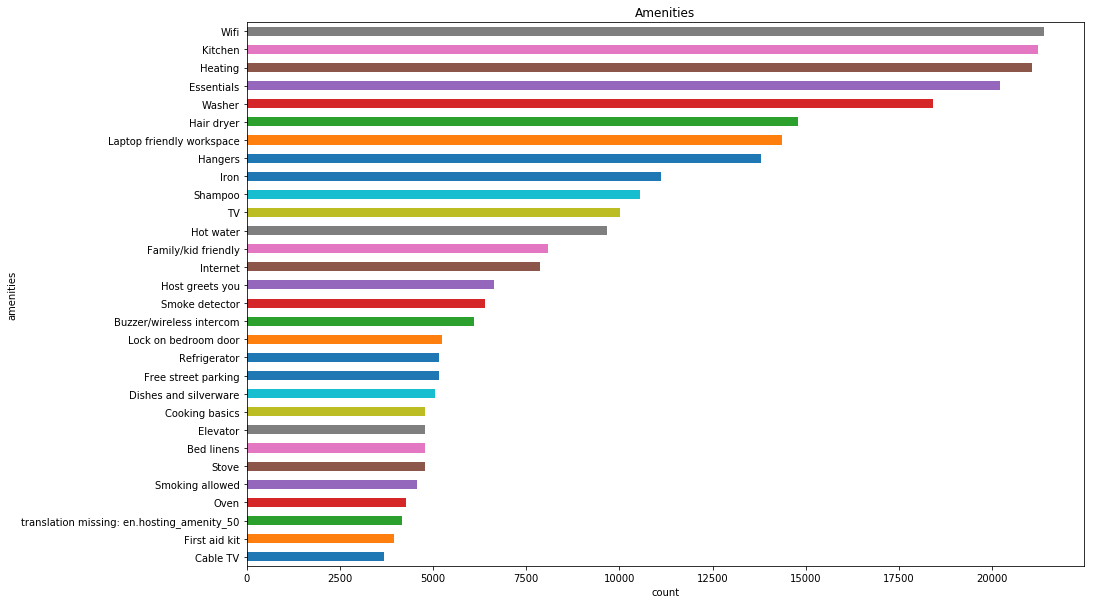

In [82]:
# sort the amenities acording to their counts.
sub_df20.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenities', y='count', figsize = (15, 10), legend = False,
                                                       title = 'Amenities')
plt.xlabel('count')

In [83]:
# create new features of few amenities.

df4['Laptop_friendly_workspace'] = df['amenities'].str.contains('Laptop friendly workspace')
df4['Family_kid_friendly'] = df['amenities'].str.contains('Family/kid friendly')
df4['Host_greets_you'] = df['amenities'].str.contains('Host greets you')
df4['Smoking_allowed'] = df['amenities'].str.contains('Smoking allowed')
df4['Kitchen'] = df['amenities'].str.contains('Kitchen')
df4['Hot_water'] = df['amenities'].str.contains('Hot water')
df4['Refrigerator'] = df['amenities'].str.contains('Refrigerator')
df4['Internet'] = df['amenities'].str.contains('Internet')
df4['Bed_linens'] = df['amenities'].str.contains('Bed linens')
df4['Cable_tv'] = df['amenities'].str.contains('Cable TV')
df4['Stove'] = df['amenities'].str.contains('Stove')

In [84]:
df4.shape

(22410, 43)

In [85]:
df4.head()

,host_id,host_identity_verified,accommodates,price,cleaning_fee,security_deposit,extra_people,guests_included,distance,size,...,Family_kid_friendly,Host_greets_you,Smoking_allowed,Kitchen,Hot_water,Refrigerator,Internet,Bed_linens,Cable_tv,Stove
2015,2217,1.0,3,60.0,30.0,200.0,28.0,1,2.874550,75.0,...,True,False,False,True,True,True,False,True,True,True
2695,2986,1.0,2,17.0,0.0,0.0,0.0,1,3.241947,25.0,...,False,False,False,True,False,False,False,False,False,False
3176,3718,1.0,4,90.0,50.0,200.0,20.0,2,3.882538,68.0,...,True,False,False,True,False,False,True,False,False,False
3309,4108,1.0,2,26.0,30.0,250.0,18.0,1,4.341974,26.0,...,False,True,False,False,True,False,True,True,False,False
7071,17391,1.0,2,42.0,0.0,0.0,24.0,1,3.762288,20.0,...,True,False,False,False,True,False,False,True,False,False


In [86]:
df4.drop('amenities', inplace = True, axis = 1)

In [87]:
# Assign numerical values to the new created amenities column.
df4['Laptop_friendly_workspace'].replace({True: 1, False: 0},inplace = True )
df4['Family_kid_friendly'].replace({True: 1, False: 0},inplace = True )
df4['Host_greets_you'].replace({True: 1, False: 0},inplace = True )
df4['Smoking_allowed'].replace({True: 1, False: 0},inplace = True )
df4['Kitchen'].replace({True: 1, False: 0},inplace = True )
df4['Hot_water'].replace({True: 1, False: 0},inplace = True )
df4['Refrigerator'].replace({True: 1, False: 0},inplace = True )
df4['Internet'].replace({True: 1, False: 0},inplace = True )
df4['Bed_linens'].replace({True: 1, False: 0},inplace = True )
df4['Cable_tv'].replace({True: 1, False: 0},inplace = True )
df4['Stove'].replace({True: 1, False: 0},inplace = True )

In [88]:
df4.head()

,host_id,host_identity_verified,accommodates,price,cleaning_fee,security_deposit,extra_people,guests_included,distance,size,...,Family_kid_friendly,Host_greets_you,Smoking_allowed,Kitchen,Hot_water,Refrigerator,Internet,Bed_linens,Cable_tv,Stove
2015,2217,1.0,3,60.0,30.0,200.0,28.0,1,2.874550,75.0,...,1,0,0,1,1,1,0,1,1,1
2695,2986,1.0,2,17.0,0.0,0.0,0.0,1,3.241947,25.0,...,0,0,0,1,0,0,0,0,0,0
3176,3718,1.0,4,90.0,50.0,200.0,20.0,2,3.882538,68.0,...,1,0,0,1,0,0,1,0,0,0
3309,4108,1.0,2,26.0,30.0,250.0,18.0,1,4.341974,26.0,...,0,1,0,0,1,0,1,1,0,0
7071,17391,1.0,2,42.0,0.0,0.0,24.0,1,3.762288,20.0,...,1,0,0,0,1,0,0,1,0,0


In [89]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22410 entries, 2015 to 29867352
Data columns (total 42 columns):
host_id                      22410 non-null int64
host_identity_verified       22410 non-null float64
accommodates                 22410 non-null int64
price                        22410 non-null float64
cleaning_fee                 22410 non-null float64
security_deposit             22410 non-null float64
extra_people                 22410 non-null float64
guests_included              22410 non-null int64
distance                     22410 non-null float64
size                         22410 non-null float64
bathrooms                    22410 non-null float64
bedrooms                     22410 non-null float64
beds                         22410 non-null float64
neighbourhood_group          22410 non-null object
city                         22410 non-null object
market                       22410 non-null object
smart_location               22410 non-null object
country    

In [90]:
# Data analysis

Text(0.5,0,'count')

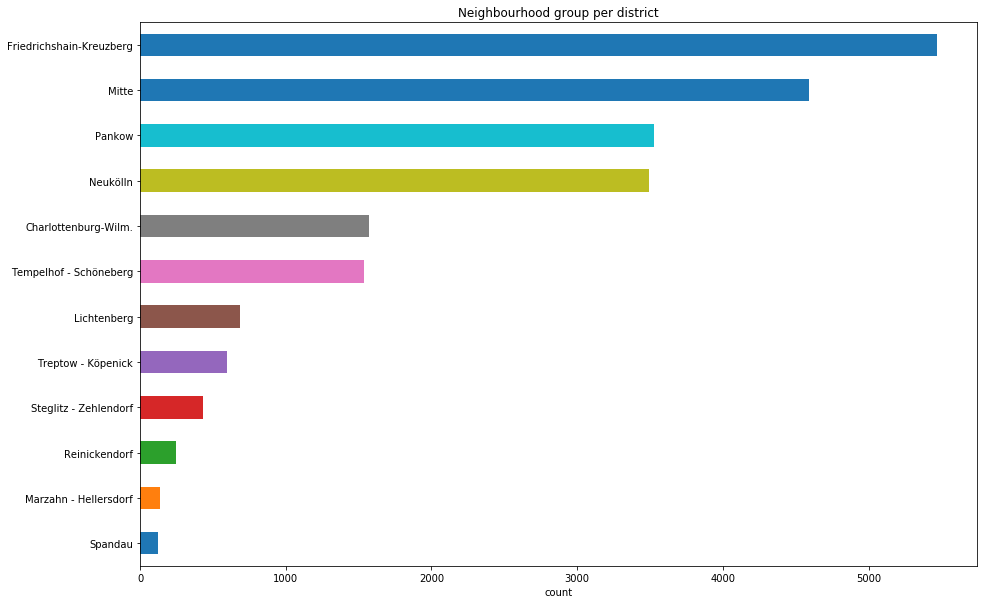

In [91]:
df4['neighbourhood_group'].value_counts().sort_values().plot(kind='barh', x='neighbourhood_group', y='count', figsize = (15, 10), legend = False,
                                                       title = 'Neighbourhood group per district')
plt.xlabel('count')

In [92]:
df4_grouped = pd.DataFrame(df4.groupby(by = 'neighbourhood_group')['price'].agg(np.mean))

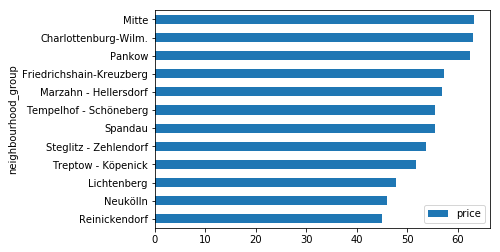

In [93]:
df4_grouped.sort_values(by = 'price').plot(kind = 'barh')

In [94]:
 # Now, if you look into the bedrooms column, there is floating numbers whihc is not possible. Thus, round of the number of bedrooms.
decimals = 0   
df4['bedrooms'] = df4['bedrooms'].apply(lambda x: round(x, decimals))


In [95]:
 df4['bedrooms'].nunique()

10

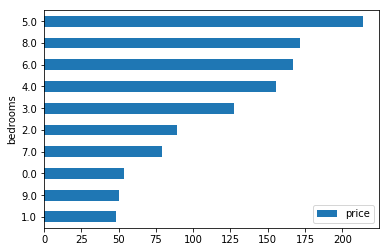

In [96]:
df4_grp_bedrooms = pd.DataFrame(df4.groupby(by = 'bedrooms')['price'].agg(np.mean))
df4_grp_bedrooms.sort_values(by = 'price').plot(kind = 'barh')

In [97]:
# Now, if you look into the beds column, there is floating numbers whihc is not possible. Thus, round of the number of beds.
decimals = 0   
df4['beds'] = df4['beds'].apply(lambda x: round(x, decimals))

In [98]:
df4['beds'].nunique()

17

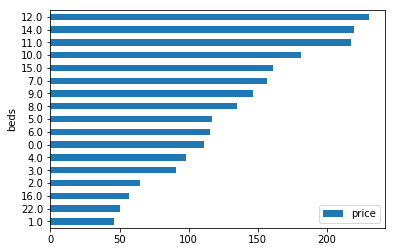

In [99]:
df4_grp_beds = pd.DataFrame(df4.groupby(by = 'beds')['price'].agg(np.mean))
df4_grp_beds.sort_values(by = 'price').plot(kind = 'barh')

In [100]:
df4.drop(['market','smart_location', 'country', 'calendar_updated', 'is_business_travel_ready'], axis =1, inplace = True)

In [101]:
df4.shape

(22410, 37)

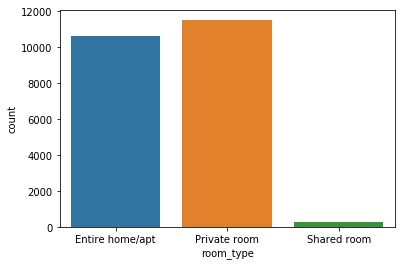

In [102]:
sns.countplot('room_type', data = df4)

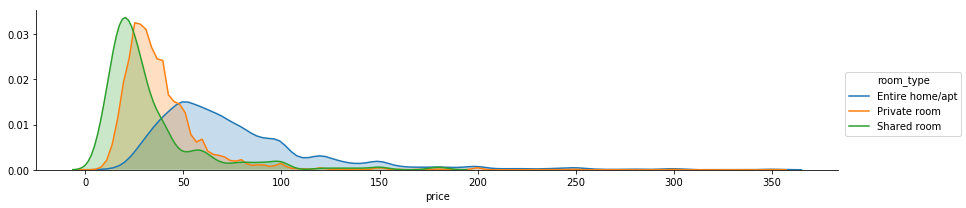

In [103]:
fig = sns.FacetGrid(df4,hue = 'room_type',aspect=4)
fig.map(sns.kdeplot,'price',shade=True)
fig.add_legend()

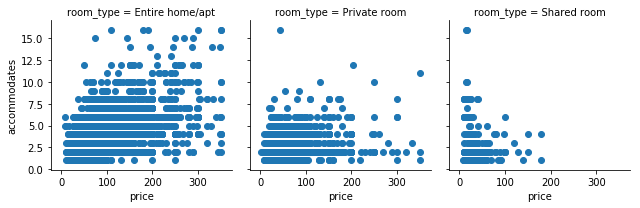

<Figure size 720x864 with 0 Axes>

In [104]:
g = sns.FacetGrid(df4, col="room_type")
g = g.map(plt.scatter, "price", "accommodates")
figure = plt.figure(figsize = (10, 12))

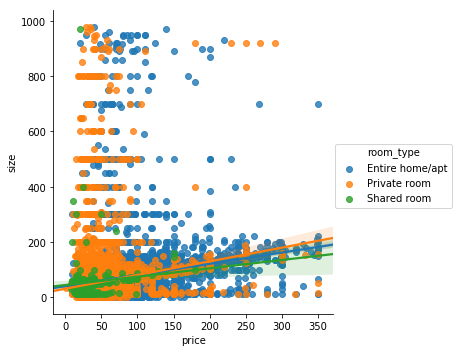

In [105]:
sns.lmplot('price','size', hue ='room_type', data=df4)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


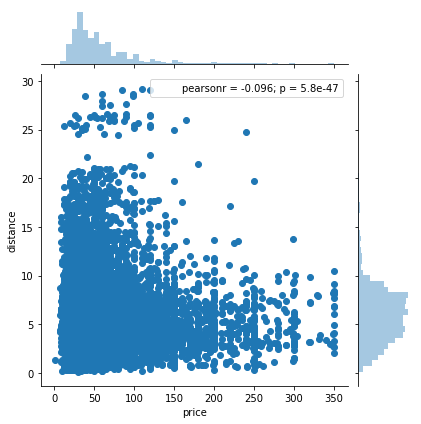

In [106]:
sns.jointplot('price', 'distance', data = df4)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


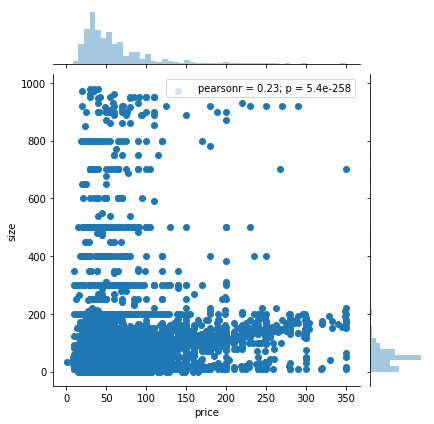

In [107]:
sns.jointplot('price', 'size', data = df4)

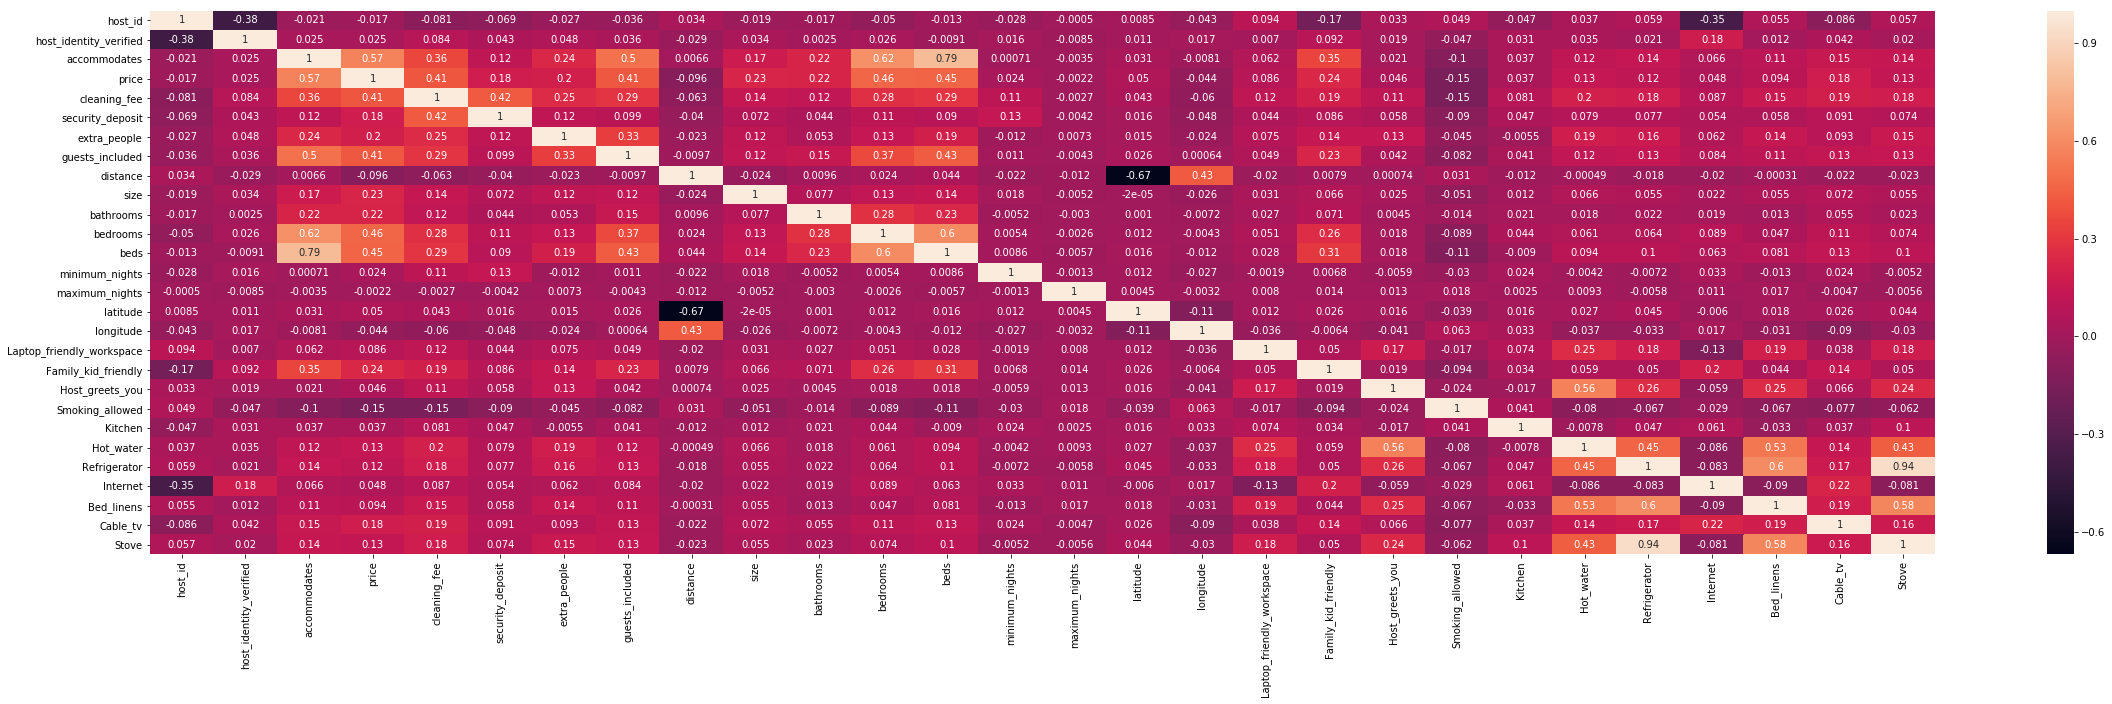

In [112]:
corr = df4.corr()
ax = sns.heatmap(corr, annot = True)
from pylab import rcParams
rcParams['figure.figsize'] = 40, 10

In [113]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22410 entries, 2015 to 29867352
Data columns (total 37 columns):
host_id                      22410 non-null int64
host_identity_verified       22410 non-null float64
accommodates                 22410 non-null int64
price                        22410 non-null float64
cleaning_fee                 22410 non-null float64
security_deposit             22410 non-null float64
extra_people                 22410 non-null float64
guests_included              22410 non-null int64
distance                     22410 non-null float64
size                         22410 non-null float64
bathrooms                    22410 non-null float64
bedrooms                     22410 non-null float64
beds                         22410 non-null float64
neighbourhood_group          22410 non-null object
city                         22410 non-null object
is_location_exact            22410 non-null object
property_type                22410 non-null object
room_type  

In [ ]:
# separate numerical features and categorical features.
num_feats = df4.select_dtypes(include=['float64', 'int64', 'bool'])
cat_feats = df4.select_dtypes(include=['category'])
cat_feats = pd.get_dummies(cat_feats)

In [117]:
features_recoded = pd.concat([num_feats, cat_feats], axis=1)

In [118]:
print(features_recoded.shape)

(22410, 28)


In [119]:
features_recoded.head()

,host_id,host_identity_verified,accommodates,price,cleaning_fee,security_deposit,extra_people,guests_included,distance,size,...,Family_kid_friendly,Host_greets_you,Smoking_allowed,Kitchen,Hot_water,Refrigerator,Internet,Bed_linens,Cable_tv,Stove
2015,2217,1.0,3,60.0,30.0,200.0,28.0,1,2.874550,75.0,...,1,0,0,1,1,1,0,1,1,1
2695,2986,1.0,2,17.0,0.0,0.0,0.0,1,3.241947,25.0,...,0,0,0,1,0,0,0,0,0,0
3176,3718,1.0,4,90.0,50.0,200.0,20.0,2,3.882538,68.0,...,1,0,0,1,0,0,1,0,0,0
3309,4108,1.0,2,26.0,30.0,250.0,18.0,1,4.341974,26.0,...,0,1,0,0,1,0,1,1,0,0
7071,17391,1.0,2,42.0,0.0,0.0,24.0,1,3.762288,20.0,...,1,0,0,0,1,0,0,1,0,0


In [120]:
features_recoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22410 entries, 2015 to 29867352
Data columns (total 28 columns):
host_id                      22410 non-null int64
host_identity_verified       22410 non-null float64
accommodates                 22410 non-null int64
price                        22410 non-null float64
cleaning_fee                 22410 non-null float64
security_deposit             22410 non-null float64
extra_people                 22410 non-null float64
guests_included              22410 non-null int64
distance                     22410 non-null float64
size                         22410 non-null float64
bathrooms                    22410 non-null float64
bedrooms                     22410 non-null float64
beds                         22410 non-null float64
minimum_nights               22410 non-null int64
maximum_nights               22410 non-null int64
latitude                     22410 non-null float64
longitude                    22410 non-null float64
Laptop_frie

In [121]:
# scaled the data and then use random forest regressor fo the prediction.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [122]:
data_scaled = ss.fit_transform(features_recoded)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [123]:
data_scaled.shape

(22410, 28)

In [124]:
data_scaled = pd.DataFrame(data_scaled, columns = features_recoded.columns)

In [125]:
data_scaled.head()

,host_id,host_identity_verified,accommodates,price,cleaning_fee,security_deposit,extra_people,guests_included,distance,size,...,Family_kid_friendly,Host_greets_you,Smoking_allowed,Kitchen,Hot_water,Refrigerator,Internet,Bed_linens,Cable_tv,Stove
0,-0.928274,1.259471,0.262446,0.071247,0.487118,0.278541,1.777430,-0.404618,-1.014118,0.185070,...,1.331476,-0.648191,-0.506128,0.236179,1.146354,1.826095,-0.735707,1.917941,2.254199,1.920746
1,-0.928260,1.259471,-0.425037,-0.994659,-0.737146,-0.391116,-0.742924,-0.404618,-0.896176,-0.434700,...,-0.751046,-0.648191,-0.506128,0.236179,-0.872331,-0.547617,-0.735707,-0.521393,-0.443617,-0.520631
2,-0.928248,1.259471,0.949930,0.814903,1.303295,0.278541,1.057329,0.840745,-0.690534,0.098302,...,1.331476,-0.648191,-0.506128,0.236179,-0.872331,-0.547617,1.359236,-0.521393,-0.443617,-0.520631
3,-0.928241,1.259471,-0.425037,-0.771562,0.487118,0.445956,0.877304,-0.404618,-0.543046,-0.422305,...,-0.751046,1.542754,-0.506128,-4.234072,1.146354,-0.547617,1.359236,1.917941,-0.443617,-0.520631
4,-0.928012,1.259471,-0.425037,-0.374946,-0.737146,-0.391116,1.417380,-0.404618,-0.729137,-0.496677,...,1.331476,-0.648191,-0.506128,-4.234072,1.146354,-0.547617,-0.735707,1.917941,-0.443617,-0.520631


In [126]:
from sklearn.ensemble import RandomForestRegressor


In [127]:
# import train_test_split function
from sklearn.model_selection import train_test_split
# import metrics
#from sklearn.metrics import mean_squared_error, r2_score
X = data_scaled.drop(['price'], axis =1)
y = data_scaled[['price']]

# split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [128]:
#scale data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
param_grid = {
                 'n_estimators': [5, 10, 15, 20, 50, 100],
                 'max_depth': [2, 5, 7, 9, 10]
             }

In [134]:
model = RandomForestRegressor()

In [135]:
grid_model = GridSearchCV(model, param_grid, cv=10)
grid_model.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 15, 20, 50, 100], 'max_depth': [2, 5, 7, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [136]:
grid_model.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [138]:
model = RandomForestRegressor(n_estimators = 100, max_depth = 10, oob_score=True, random_state=42)
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [139]:
model.oob_score_

0.64939391172706

In [140]:
predict = model.predict(X_test)

In [141]:
from sklearn.metrics import scorer

In [142]:
model.score(X_test, y_test)

0.6493612840884911

In [143]:
model.score(X_train, y_train)

0.8285509362406115

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


50 trees


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


100 trees


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


500 trees


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


1000 trees


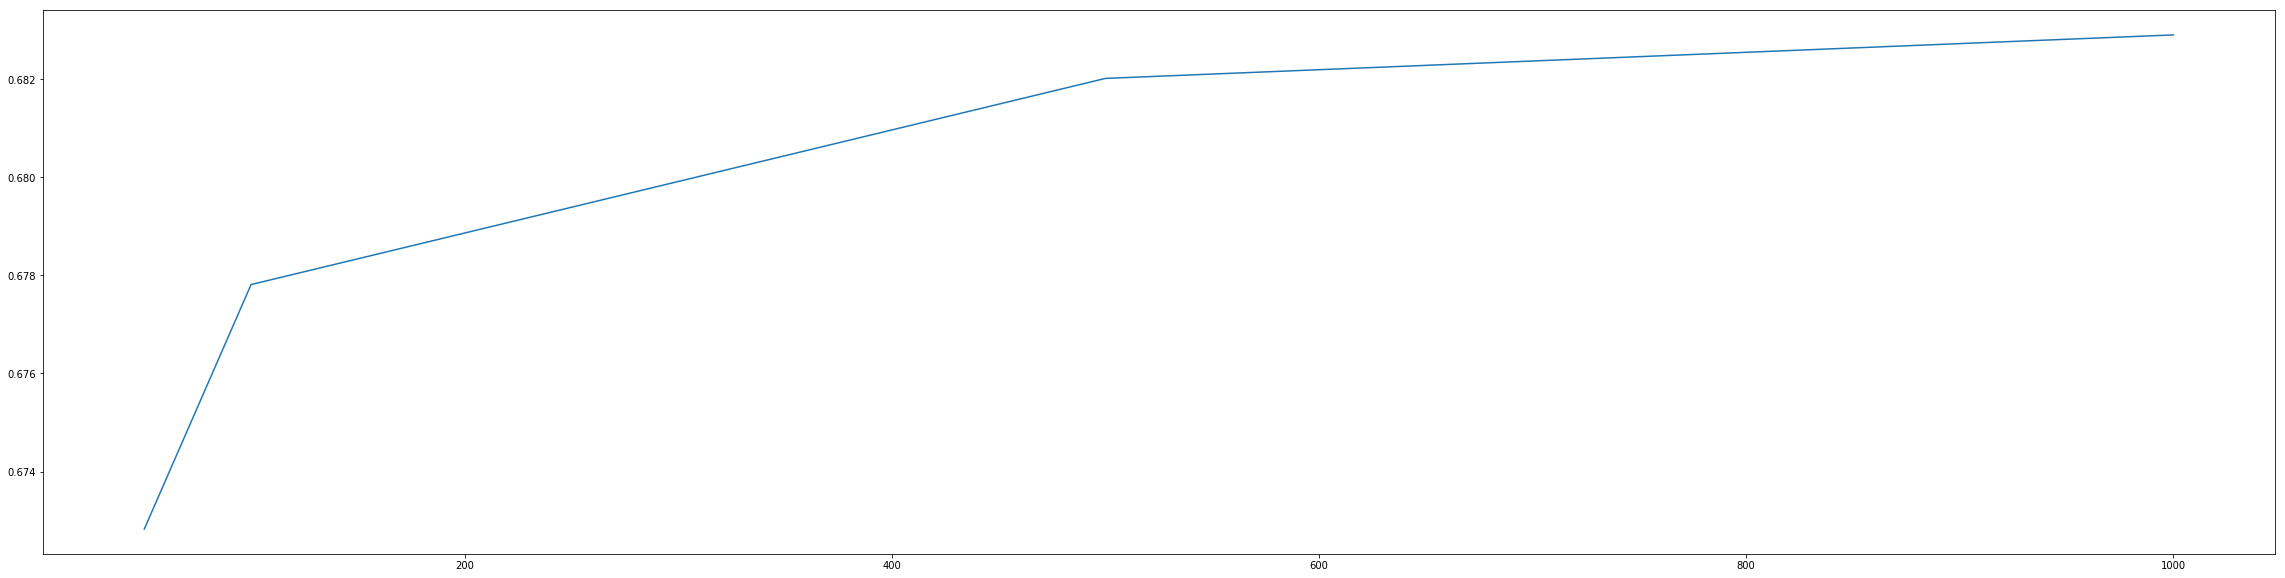

In [140]:
results = []
n_estimators_options = [50, 100, 500, 1000]
for trees in n_estimators_options:
    model = RandomForestRegressor(trees, oob_score=True, random_state=42, n_jobs = -1)
    model.fit(X_train, y_train)
    print(trees, 'trees')
    score = model.score(X_test, y_test)
    results.append(score)
pd.Series(results, n_estimators_options).plot()
    

In [144]:
model1 = RandomForestRegressor(n_estimators = 500, max_depth = 10, oob_score=True, random_state=42)
model1.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [145]:
predict1 = model.predict(X_test)

In [146]:
from sklearn.metrics import r2_score

In [147]:
sklearn.metrics.r2_score(y_test, predict1)

0.6493612840884911

In [148]:
model.score(X_test, y_test)

0.6493612840884911

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWa

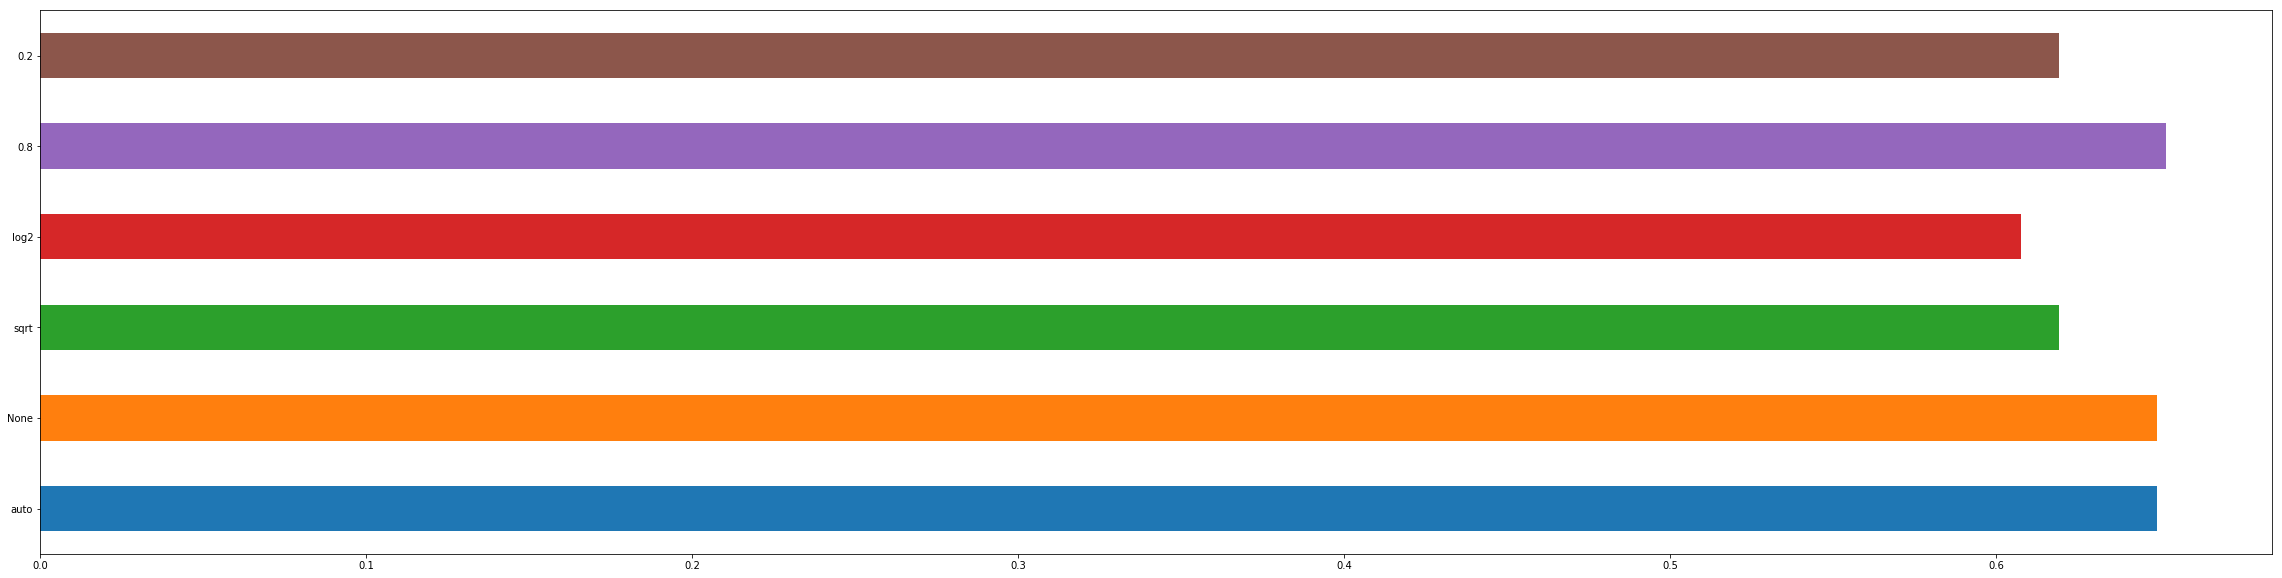

In [149]:
results = []
max_features_options = ['auto', None, 'sqrt', 'log2', 0.8, 0.2]
for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators =500, max_depth = 10, oob_score=True, random_state=42, max_features = max_features)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results.append(score)
pd.Series(results, max_features_options).plot(kind = 'barh')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWa

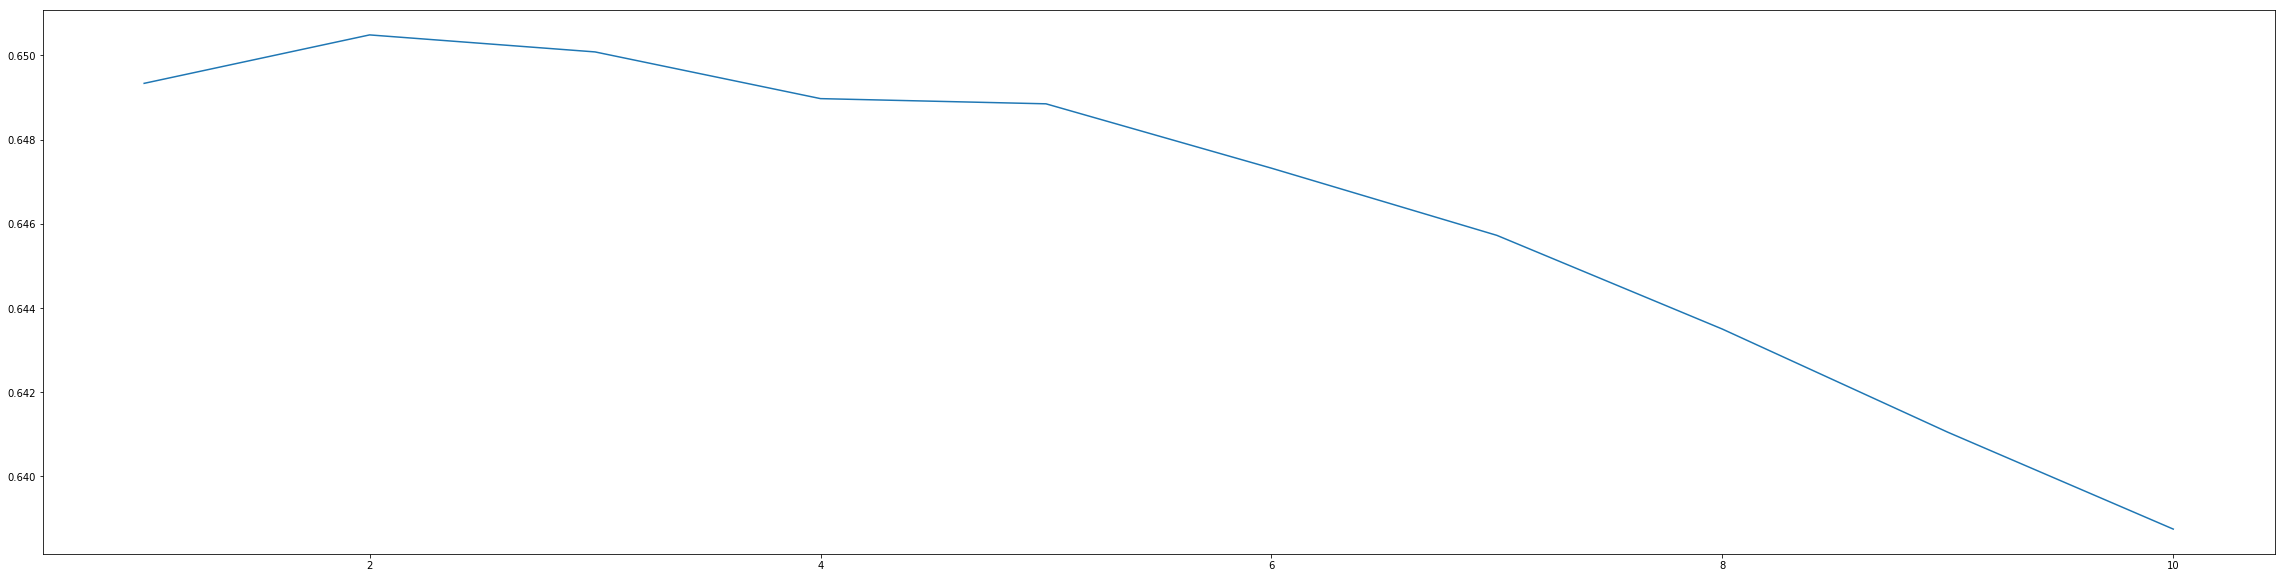

In [151]:
results = []
min_samples_leaf_options = [1,2,3,4,5,6,7,8,9,10]
for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators =500, max_depth = 10, oob_score=True, random_state=42, max_features = 'auto', min_samples_leaf=min_samples)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results.append(score)
pd.Series(results, min_samples_leaf_options).plot()

In [152]:
model1 = RandomForestRegressor(n_estimators = 500, max_features= 'auto', max_depth=10, min_samples_leaf = 5, oob_score=True, random_state=42)
model1.fit(X_train, y_train)
predict2 = model.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [153]:
sklearn.metrics.r2_score(y_test, predict2)

0.638748724318007

In [154]:
model1.score(X_train, y_train)

0.7871354202850049

In [131]:
import xgboost as xgb

In [132]:
booster = xgb.XGBRegressor(n_estimators=500)

In [133]:
booster.fit(X_train, y_train)



[14:04:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [134]:
predict3 = booster.predict(X_test)

In [135]:
sklearn.metrics.r2_score(y_test, predict3)

0.6669025068760044

In [136]:
booster.score(X_train, y_train)

0.7892697187874472

In [137]:
# The algorithm is predicting the price correctly only 66%. This might be due to the fact that the data in prices is not normally distributed and the range is very wide.
# This may also mean that the price not only depends upon geographical location, size, room type, bedrooms, bathrooms, amenities but also on number of reviews,
# quality, availability, host response time, communication.


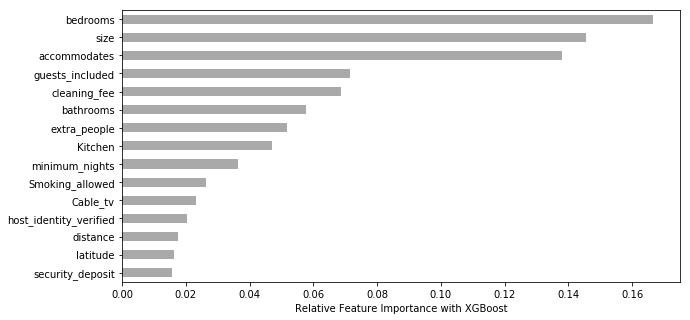

In [139]:
feat_importances = pd.Series(booster.feature_importances_, index= X.columns)
feat_importances.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Feature Importance with XGBoost');

In [ ]:
#The most important features are bedrooms, size and accomodates. Other important features are cleaning fee,number of guest included, bathrooms, bedrooms.